# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a file called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [106]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [107]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [109]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [110]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

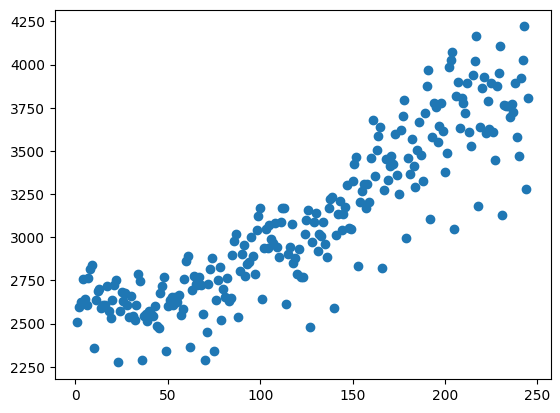

In [111]:
plt.scatter(xvals, yvals)
plt.show()

## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

beta coefficients are [2367.38176648    5.93899012]


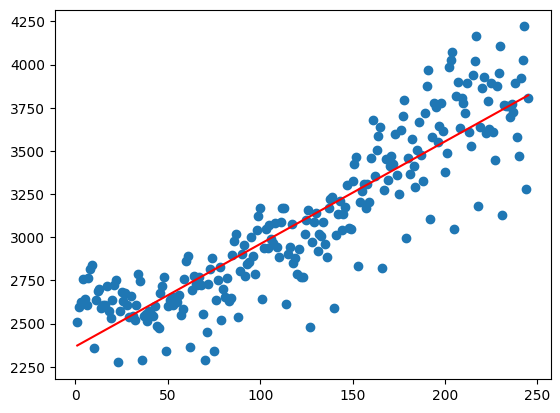

In [112]:
X = np.ones(np.shape(xvals))
X = np.transpose(np.vstack((X, xvals)))

beta = np.linalg.lstsq(X, yvals, rcond=None)[0]
print("beta coefficients are", beta)
plt.scatter(xvals, yvals)
fit = beta[0] + beta[1]*xvals
plt.plot(xvals, fit, color="red")
plt.show()

## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

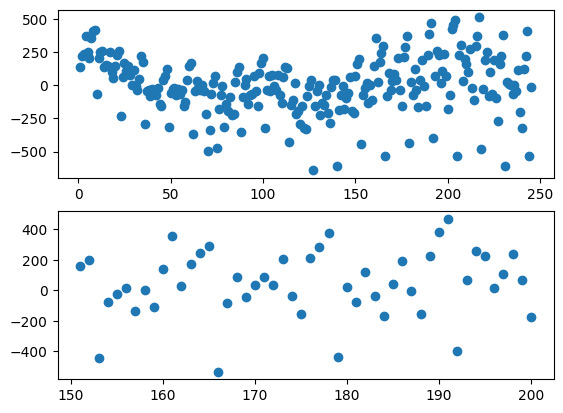

In [113]:
resid = yvals - fit
plt.subplot(211)
plt.scatter(xvals, resid)
plt.subplot(212)
plt.scatter(xvals[150:200], resid[150:200])
plt.show()

There is a clear dip every 12 indices.

### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


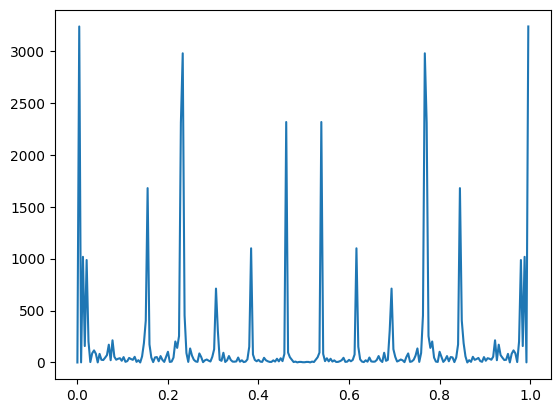

In [114]:
pgram = np.abs(np.fft.fft(resid, N)/N)**2
indices = np.linspace(0, (N-1), num = N)
T = xvals[101] - xvals[100]
freqs_in_hz = indices/(N*T)
freqs_in_rads = freqs_in_hz*2*math.pi

plt.plot(freqs_in_hz, pgram)
plt.show()




In [115]:
top_inds = np.array(indices[(pgram > 0.5*np.max(pgram))])
top_freqs_hz = freqs_in_hz[(pgram > 0.5*np.max(pgram))]
print('Top indices:', top_inds)
print('Top frequencies in Hz:', top_freqs_hz)

Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.]
Top frequencies in Hz: [0.00408163 0.15510204 0.22857143 0.23265306 0.46122449 0.53877551
 0.76734694 0.77142857 0.84489796 0.99591837]


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 

All numerical outputs should be displayed to three decimal places.

In [136]:
top_inds2 = top_inds[1:int(len(top_inds)/2+1)]
w = np.zeros(np.shape(top_inds2))
X = np.empty((len(xvals), 2))
for i in range(len(w)):
    w[i] = 2*math.pi*top_inds2[i]/(N*T)
    temp = np.transpose(np.vstack((np.sin(w[i]*xvals), np.cos(w[i]*xvals))))
    X = np.hstack((X, temp))
print(w)
print(temp)
#X = np.transpose(X)
#beta2 = np.linalg.lstsq(X, resid, rcond=None)[0]
#print("Beta coefficients are:", np.round(beta2, 3))

[0.97453486 1.43615664 1.4618023  2.89795894 3.38522637]
[[-2.41230616e-01 -9.70467820e-01]
 [ 4.68213100e-01  8.83615580e-01]
 [-6.67540877e-01 -7.44573152e-01]
 [ 8.27440779e-01  5.61552987e-01]
 [-9.38468422e-01 -3.45365054e-01]
 [ 9.94066029e-01  1.08778356e-01]
 [-9.90949762e-01  1.34233266e-01]
 [ 9.29303682e-01 -3.69316486e-01]
 [-8.12768875e-01  5.82586265e-01]
 [ 6.48228395e-01 -7.61445958e-01]
 [-4.45400720e-01  8.95331334e-01]
 [ 2.16265737e-01 -9.76334538e-01]
 [ 2.56428432e-02  9.99671168e-01]
 [-2.66036846e-01 -9.63962861e-01]
 [ 4.90717552e-01  8.71318704e-01]
 [-6.86414340e-01 -7.27210666e-01]
 [ 8.41568506e-01  5.40150396e-01]
 [-9.47015966e-01 -3.21186489e-01]
 [ 9.96528534e-01  8.32519072e-02]
 [-9.87181783e-01  1.59599895e-01]
 [ 9.19527773e-01 -3.93025032e-01]
 [-7.97562443e-01  6.03236396e-01]
 [ 6.28489598e-01 -7.77817990e-01]
 [-4.22295417e-01  9.06458262e-01]
 [ 1.91158629e-01 -9.81559157e-01]
 [ 5.12688221e-02  9.98684889e-01]
 [-2.90668113e-01 -9.56823938e-01

### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

In [12]:
plt.scatter(xvals, yvals)
fit = beta[0] + beta[1]*xvals + 
plt.plot(xvals, fit, color="red")
plt.show()

< Add comment on the improvement over the linear fit. >